In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
import os

In [4]:
transactions = pd.read_csv(os.getcwd() + '/Task 2/transactions.csv')

In [5]:
transactions.head()

transaction_id  product_id          category        date
0               1      662685      Casual Dress  2017-10-01
1               2      154881      Casual Dress  2017-10-01
2               3      220036      Casual Dress  2017-10-01
3               4      220036      Casual Dress  2017-10-01
4               5      950839  Pullover Sweater  2017-10-01

In [6]:
transactions.dtypes

transaction_id     int64
product_id         int64
category          object
date              object
dtype: object

In [7]:
day_list, month_list, year_list = [], [], []
def extract_util(grp_df):
    global day_list, month_list, year_list
    day_list += list(map(lambda x:x.split('-')[2], grp_df['date']))
    month_list += list(map(lambda x:x.split('-')[1], grp_df['date']))#[extract(grp_df.loc[i, 'date'])[1] for i in range(grp_df.shape[0])]
    year_list += list(map(lambda x:x.split('-')[0], grp_df['date']))#[extract(grp_df.loc[i, 'date'])[2] for i in range(grp_df.shape[0])]

In [8]:
#Using Group By
trans_goup = transactions.groupby('date')

In [9]:
for grp, df in trans_goup:
    extract_util(df)
    #extract_util(df)

In [10]:
transactions['Day'], transactions['Month'], transactions['Year'] = day_list, month_list, year_list

In [11]:
transactions.head()

transaction_id  product_id          category        date Day Month  Year
0               1      662685      Casual Dress  2017-10-01  01    10  2017
1               2      154881      Casual Dress  2017-10-01  01    10  2017
2               3      220036      Casual Dress  2017-10-01  01    10  2017
3               4      220036      Casual Dress  2017-10-01  01    10  2017
4               5      950839  Pullover Sweater  2017-10-01  01    10  2017

In [12]:
transactions.tail()

transaction_id  product_id          category        date Day Month  \
1203100         1203101      964150  Pullover Sweater  2018-09-30  30    09   
1203101         1203102       55866  Pullover Sweater  2018-09-30  30    09   
1203102         1203103      268421      Casual Dress  2018-09-30  30    09   
1203103         1203104      393290      Casual Dress  2018-09-30  30    09   
1203104         1203105     1105343      Casual Dress  2018-09-30  30    09   

         Year  
1203100  2018  
1203101  2018  
1203102  2018  
1203103  2018  
1203104  2018

In [13]:
#drop the date columns
#transactions = transactions.drop('date', axis=1)

In [14]:
transactions[['Day', 'Month', 'Year']].dtypes

Day      object
Month    object
Year     object
dtype: object

In [15]:
#Convert the year, month and day to integer type
Day, Month, Year = list(map(lambda x:pd.to_numeric(transactions[x]),
                      ['Day', 'Month', 'Year']))

In [16]:
list(map(lambda x:type(x), [Day, Month, Year]))

[pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series]

In [17]:
transactions['Day'] = Day
transactions['Month'] = Month
transactions['Year'] = Year

In [18]:
transactions.dtypes

transaction_id     int64
product_id         int64
category          object
date              object
Day                int64
Month              int64
Year               int64
dtype: object

## Plot the Month wise relationship with Category

In [19]:
#2017
transactions_2017 = transactions.loc[transactions['Year']==2017, :]

#2018
transactions_2018 = transactions.loc[transactions['Year']==2018, :]

In [20]:
transactions_2017.head()

transaction_id  product_id          category        date  Day  Month  Year
0               1      662685      Casual Dress  2017-10-01    1     10  2017
1               2      154881      Casual Dress  2017-10-01    1     10  2017
2               3      220036      Casual Dress  2017-10-01    1     10  2017
3               4      220036      Casual Dress  2017-10-01    1     10  2017
4               5      950839  Pullover Sweater  2017-10-01    1     10  2017

In [21]:
trans_2017_grp = transactions_2017.groupby('Month')
trans_2018_grp = transactions_2018.groupby('Month')

In [22]:
trans_2017_grp.Year.unique()

Month
10    [2017]
11    [2017]
12    [2017]
Name: Year, dtype: object

In [24]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label s

In [40]:
def month_wise_purchase(year_group, year=None):
    months = []
    
    for grp, df in year_group:
        print("Month " + str(grp))
        
        count = dict(Counter(list(df.category)))
        print(count)
    
        category = count.keys()
        count = count.values()
    
        plt.scatter(category, count)
        plt.xlabel('Category')
        plt.ylabel('Category Count')
        
        #Append the months for using as as Symbols
        months.append(grp)
        
    plt.title('The count of categories month-wise')    
    plt.legend(months)
    
    plt.savefig(os.getcwd() + '/' + year + ".png")

Year 2017
Month 10
{'Casual Dress': 56963, 'Pullover Sweater': 31239, 'Sleeveless Blouse': 11841, 'Fleece Jacket': 798}
Month 11
{'Casual Dress': 54334, 'Pullover Sweater': 29354, 'Sleeveless Blouse': 10918, 'Fleece Jacket': 645}
Month 12
{'Casual Dress': 52338, 'Pullover Sweater': 24862, 'Sleeveless Blouse': 10481, 'Fleece Jacket': 449}


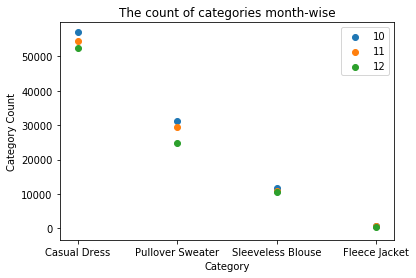

In [26]:
print('Year 2017')
month_wise_purchase(trans_2017_grp, '2017') 

Year 2018
Month 1
{'Casual Dress': 66649, 'Pullover Sweater': 22481, 'Sleeveless Blouse': 14674, 'Fleece Jacket': 498}
Month 2
{'Casual Dress': 91162, 'Sleeveless Blouse': 22752, 'Pullover Sweater': 24109, 'Fleece Jacket': 474}
Month 3
{'Casual Dress': 82695, 'Sleeveless Blouse': 18177, 'Pullover Sweater': 20045, 'Fleece Jacket': 407}
Month 4
{'Casual Dress': 60434, 'Sleeveless Blouse': 14516, 'Pullover Sweater': 12886, 'Fleece Jacket': 261}
Month 5
{'Sleeveless Blouse': 19962, 'Casual Dress': 80490, 'Pullover Sweater': 13732, 'Fleece Jacket': 374}
Month 6
{'Sleeveless Blouse': 15559, 'Casual Dress': 63372, 'Pullover Sweater': 10356, 'Fleece Jacket': 336}
Month 7
{'Casual Dress': 62865, 'Sleeveless Blouse': 14183, 'Pullover Sweater': 15219, 'Fleece Jacket': 581}
Month 8
{'Pullover Sweater': 18570, 'Casual Dress': 58148, 'Sleeveless Blouse': 12653, 'Fleece Jacket': 740}
Month 9
{'Casual Dress': 47438, 'Sleeveless Blouse': 10197, 'Pullover Sweater': 21243, 'Fleece Jacket': 645}


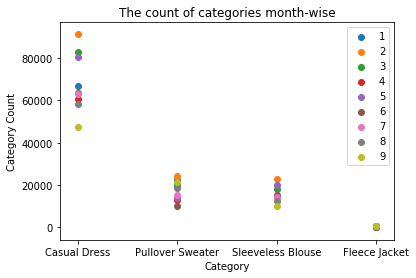

In [27]:
print('Year 2018')
month_wise_purchase(trans_2018_grp, '2018')

## Analyzing Each Individual Category

In [32]:
def get_category(cat_name):
    return(transactions.loc[transactions['category']==cat_name
                                , :].groupby('Month'))

In [35]:
cat_names = np.unique(transactions['category']).tolist()
cat_names

['Casual Dress', 'Fleece Jacket', 'Pullover Sweater', 'Sleeveless Blouse']

In [38]:

casual_dress_grp, pullover_grp, sleeveless_grp, fleece_grp = [get_category(cat_name) for cat_name in cat_names]

### Casual Dress

In [41]:
def cat_wise_purchase(cat_group):
    months = []
    
    for grp, df in cat_group:
        print("Category " + str(grp))
        
        count = dict(Counter(list(df.category)))
        print(count)
    
        category = count.keys()
        count = count.values()
    
        plt.scatter(category, count)
        plt.xlabel('Category')
        plt.ylabel('Category Count')
        
        #Append the months for using as as Symbols
        months.append(grp)
        
    plt.title('The count of categories month-wise')    
    plt.legend(months)
    plt.savefig(os.getcwd() + '/' + year + ".png")

### Pullover Sweater

### Sleeveless Blouse

### Fleece Jacket

In [ ]:

#Plot the total monthly category count 
count = dict(Counter(list(df.category)))
print(count)
    
category = count.keys()
count = count.values()
    
plt.scatter(category, count)
plt.xlabel('Category')
plt.ylabel('Category Count')